Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1325 - val_loss: 0.0298
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - val_loss: 0.0051
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - val_loss: 0.0064
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - val_loss: 0.0061
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022 - val_loss: 0.0025
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
📊 RMSE: 31.43
📊 MAE : 26.23


/tmp/ipython-input-1-3874144943.py:93: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


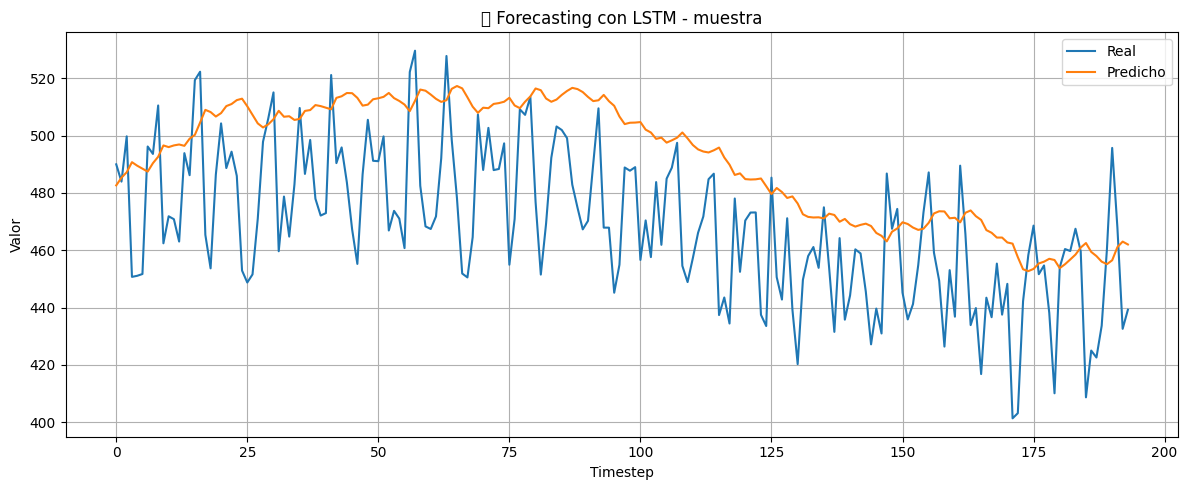

In [1]:
# ✅ 0. INSTALACIÓN (solo si usas Google Colab)
!pip install -q tensorflow

# 📦 1. IMPORTACIONES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ================================
# 2️⃣ SIMULACIÓN DE DATOS
# ================================
np.random.seed(42)
n_days = 1000
dates = pd.date_range(start="2020-01-01", periods=n_days, freq="D")
trend = np.linspace(100, 500, n_days)
seasonality = 50 * np.sin(2 * np.pi * np.arange(n_days) / 365)
noise = np.random.normal(0, 15, n_days)
external = 20 * np.sin(2 * np.pi * np.arange(n_days) / 7)  # patrón semanal

data = trend + seasonality + noise + external
df = pd.DataFrame({'date': dates, 'value': data})

# ================================
# 3️⃣ NORMALIZACIÓN
# ================================
scaler = MinMaxScaler()
df['scaled'] = scaler.fit_transform(df[['value']])

# ================================
# 4️⃣ CREAR SECUENCIAS PARA LSTM
# ================================
def create_sequences(series, window_size=30):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
series = df['scaled'].values
X, y = create_sequences(series, window_size)

# ================================
# 5️⃣ SPLIT TRAIN/TEST
# ================================
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ================================
# 6️⃣ DEFINICIÓN DEL MODELO LSTM
# ================================
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train[..., np.newaxis], y_train,
          epochs=10, batch_size=32, validation_split=0.1)

# ================================
# 7️⃣ PREDICCIONES
# ================================
y_pred = model.predict(X_test[..., np.newaxis])
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# ================================
# 8️⃣ MÉTRICAS
# ================================
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"📊 RMSE: {rmse:.2f}")
print(f"📊 MAE : {mae:.2f}")

# ================================
# 9️⃣ VISUALIZACIÓN
# ================================
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:200], label="Real")
plt.plot(y_pred_inv[:200], label="Predicho")
plt.title("📈 Forecasting con LSTM - muestra")
plt.xlabel("Timestep")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2-151295535.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


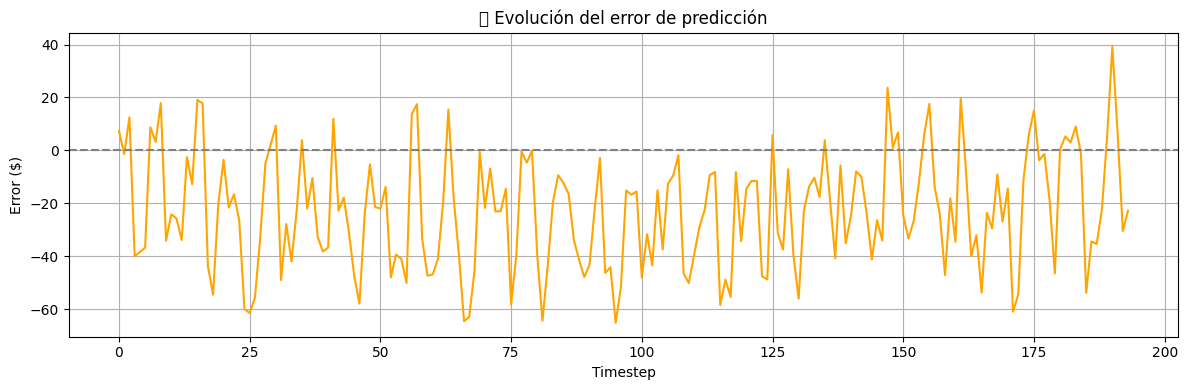

/tmp/ipython-input-2-151295535.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


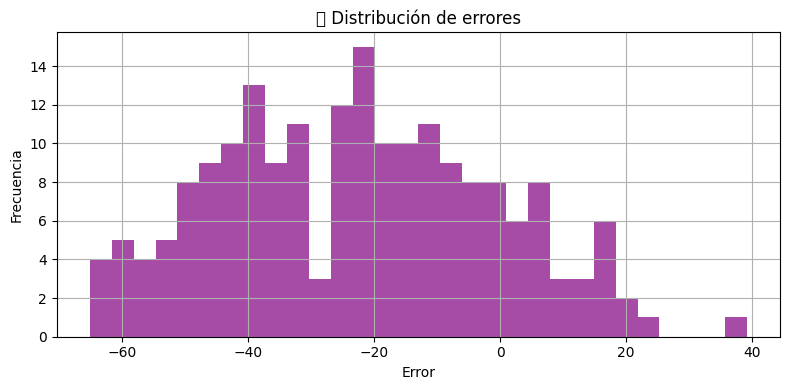

/tmp/ipython-input-2-151295535.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


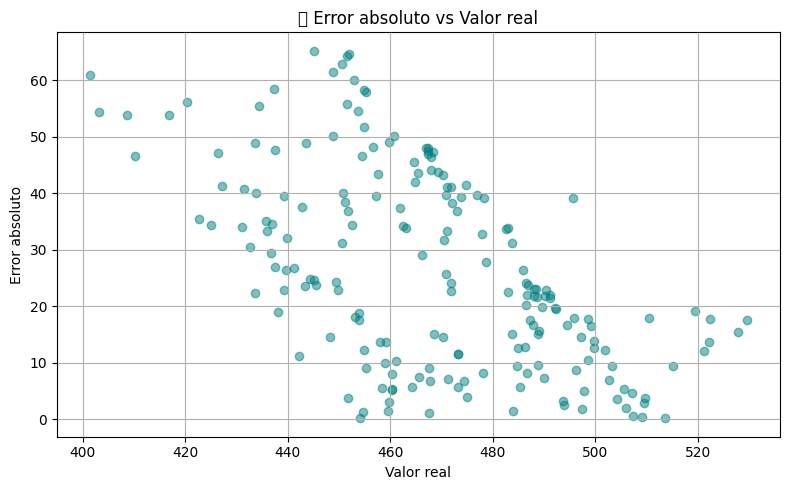

📌 MAPE (Error porcentual medio): 5.73%


In [2]:
# ================================
# 🔍 Análisis avanzado de errores
# ================================

# 1. Errores
errors = y_test_inv.flatten() - y_pred_inv.flatten()
abs_errors = np.abs(errors)
rel_errors = abs_errors / y_test_inv.flatten()

# 2. Evolución del error
plt.figure(figsize=(12, 4))
plt.plot(errors[:200], label="Error", color='orange')
plt.axhline(0, linestyle="--", color="gray")
plt.title("📉 Evolución del error de predicción")
plt.xlabel("Timestep")
plt.ylabel("Error ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Distribución de errores
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, alpha=0.7, color='purple')
plt.title("📊 Distribución de errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Error absoluto vs valor real
plt.figure(figsize=(8, 5))
plt.scatter(y_test_inv, abs_errors, alpha=0.5, color='teal')
plt.title("🎯 Error absoluto vs Valor real")
plt.xlabel("Valor real")
plt.ylabel("Error absoluto")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. MAPE (error porcentual medio)
mape = np.mean(rel_errors) * 100
print(f"📌 MAPE (Error porcentual medio): {mape:.2f}%")
